# Teams: Data Cleaning and Analysis

First, we import the libraries that we will use during the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, we import and explore the dataset that we created when scarping our source website.

In [2]:
scores = pd.read_csv(r"C:\Users\Honza Stuchlík\Documents\IES\Data Processing in Python\Czech-Football-League\scores.csv")
scores

,Game Week,Weekday,Date,Time,Home Team,Score,Away Team,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2015-07-24,17:30,Viktoria Plzeň,2–1,Slavia Prague,"11,233",Doosan Arena,Pavel Franek,Match Report,NaN
1,1.0,Fri,2015-07-24,19:00,Vysočina Jihlava,0–0,Sparta Prague,"3,894",Stadion v Jiráskově ulici,Tomas Kocourek,Match Report,NaN
2,1.0,Sat,2015-07-25,17:00,Příbram,2–3,Jablonec,"4,182",Energon Aréna,Pavel Královec,Match Report,NaN
3,1.0,Sat,2015-07-25,17:00,Slovácko,4–3,Dukla Prague,"3,726",Městský fotbalový stadion Miroslava Vale...,Zbyněk Proske,Match Report,NaN
4,1.0,Sat,2015-07-25,17:00,Zbrojovka Brno,2–1,Baník Ostrava,"5,326",Městský fotbalový stadion Srbská,Libor Kovařík,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1727,34.0,Fri,2021-05-28,NaN,Slovácko,NaN,Fastav Zlín,NaN,Městský fotbalový stadion Miroslava Vale...,NaN,Head-to-Head,NaN
1728,34.0,Fri,2021-05-28,NaN,Slavia Prague,NaN,České Budĕjov.,NaN,Sinobo Stadium,NaN,Head-to-Head,NaN
1729,34.0,Fri,2021-05-28,NaN,FK Pardubice,NaN,Jablonec,NaN,NaN,NaN,Head-to-Head,NaN
1730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

As we can see, the data requires cleaning. We want to get rid of NaN values in the column "Score" so that we have only matches that have already been played. We also split the scores into two columns - home and away team goals to be able to do meaningful computations with the values. The columns "Notes" and "Match Report" can be dropped because they do not carry any useful information.

In [3]:
scores_nona = scores[scores['Score'].notna()].copy()
scores_nona.loc[:, "Home Team Goals"] = scores_nona['Score'].astype(str).str[0].astype(int)
scores_nona.loc[:, "Away Team Goals"] = scores_nona['Score'].astype(str).str[2].astype(int)
scores_clean = scores_nona[["Date", "Weekday", "Time", "Home Team", "Away Team", "Home Team Goals", "Away Team Goals", "Venue", "Referee"]]
scores_clean

,Date,Weekday,Time,Home Team,Away Team,Home Team Goals,Away Team Goals,Venue,Referee
0,2015-07-24,Fri,17:30,Viktoria Plzeň,Slavia Prague,2,1,Doosan Arena,Pavel Franek
1,2015-07-24,Fri,19:00,Vysočina Jihlava,Sparta Prague,0,0,Stadion v Jiráskově ulici,Tomas Kocourek
2,2015-07-25,Sat,17:00,Příbram,Jablonec,2,3,Energon Aréna,Pavel Královec
3,2015-07-25,Sat,17:00,Slovácko,Dukla Prague,4,3,Městský fotbalový stadion Miroslava Vale...,Zbyněk Proske
4,2015-07-25,Sat,17:00,Zbrojovka Brno,Baník Ostrava,2,1,Městský fotbalový stadion Srbská,Libor Kovařík
...,...,...,...,...,...,...,...,...,...
1524,2020-12-23,Wed,15:00,Karviná,FK Pardubice,0,2,Městský stadion,Miroslav Zelinka
1526,2020-12-23,Wed,15:00,Fastav Zlín,Teplice,2,3,Stadion Letná,J. Machálek
1527,2020-12-23,Wed,15:00,Zbrojovka Brno,Baník Ostrava,0,1,Městský fotbalový stadion Srbská,Ondřej Berka
1528,2020-12-23,Wed,15:00,Mladá Boleslav,Slovácko,2,3,Adidas Aréna,Jan Petřík


In [4]:
scores_clean.to_csv(r"C:\Users\Honza Stuchlík\Documents\IES\Data Processing in Python\Czech-Football-League\scores_clean.csv", index = False)

## Data Analysis

We are interested in the numbers of goals scored by teams playing on their home pitch and away and more specifically we want to compare the values to see whether teams are stronger when they play at home, i.e. if they score more goals at home and what is the difference between goals scored at home and away.

In [5]:
total_home_goals = sum(scores_clean["Home Team Goals"])
total_away_goals = sum(scores_clean["Away Team Goals"])
goal_difference = total_home_goals - total_away_goals
print("Total Home Goals: " + str(total_home_goals))
print("Total Away Goals: " + str(total_away_goals))
print("Goal Difference: " + str(goal_difference))

Total Home Goals: 2077
Total Away Goals: 1444
Goal Difference: 633


The following pivot tables show the distribution of goals scored both at home and away by all teams that took part in any of the chosen seasons.

In [6]:
home_goal_dist_table = pd.pivot_table(scores_clean, values = "Home Team Goals", index = "Home Team", aggfunc = np.sum)
away_goal_dist_table = pd.pivot_table(scores_clean, values = "Away Team Goals", index = "Away Team", aggfunc = np.sum)
home_goal_dist_table

,Home Team Goals
Home Team,
Baník Ostrava,90
Bohemians 1905,100
Dukla Prague,89
FK Pardubice,10
Fastav Zlín,98
Hradec Králové,11
Jablonec,159
Karviná,85
Mladá Boleslav,157


In [7]:
away_goal_dist_table

,Away Team Goals
Away Team,
Baník Ostrava,74
Bohemians 1905,78
Dukla Prague,54
FK Pardubice,5
Fastav Zlín,81
Hradec Králové,18
Jablonec,108
Karviná,65
Mladá Boleslav,115


To see all information about scored goals we converted the pivot tables into dataframes, we merged them together and created a new column "Total Goals" which is the sum of goals scored at home and away by each team.

In [8]:
home_goals_dist_df = pd.DataFrame(home_goal_dist_table)
home_goals_dist_df["Team"] = home_goals_dist_df.index
away_goals_dist_df = pd.DataFrame(away_goal_dist_table)
away_goals_dist_df["Team"] = away_goals_dist_df.index
goals_df = pd.merge(home_goals_dist_df, away_goals_dist_df, on = "Team")
goals_df["Total Goals"] = goals_df["Home Team Goals"] + goals_df["Away Team Goals"]
goals_df = goals_df.reindex(columns=["Team", "Home Team Goals", "Away Team Goals", "Total Goals"])
goals_df_sortedby_total = goals_df.sort_values(by = "Total Goals", ascending = False)
goals_df_sortedby_total

,Team,Home Team Goals,Away Team Goals,Total Goals
12,Slavia Prague,191,148,339
17,Viktoria Plzeň,187,120,307
15,Sparta Prague,188,111,299
8,Mladá Boleslav,157,115,272
6,Jablonec,159,108,267
13,Slovan Liberec,150,75,225
14,Slovácko,115,74,189
4,Fastav Zlín,98,81,179
1,Bohemians 1905,100,78,178
11,Sigma Olomouc,101,71,172


We plot the values to see the differences among teams in a nicer format. The values in each plot are sorted by its respective column.

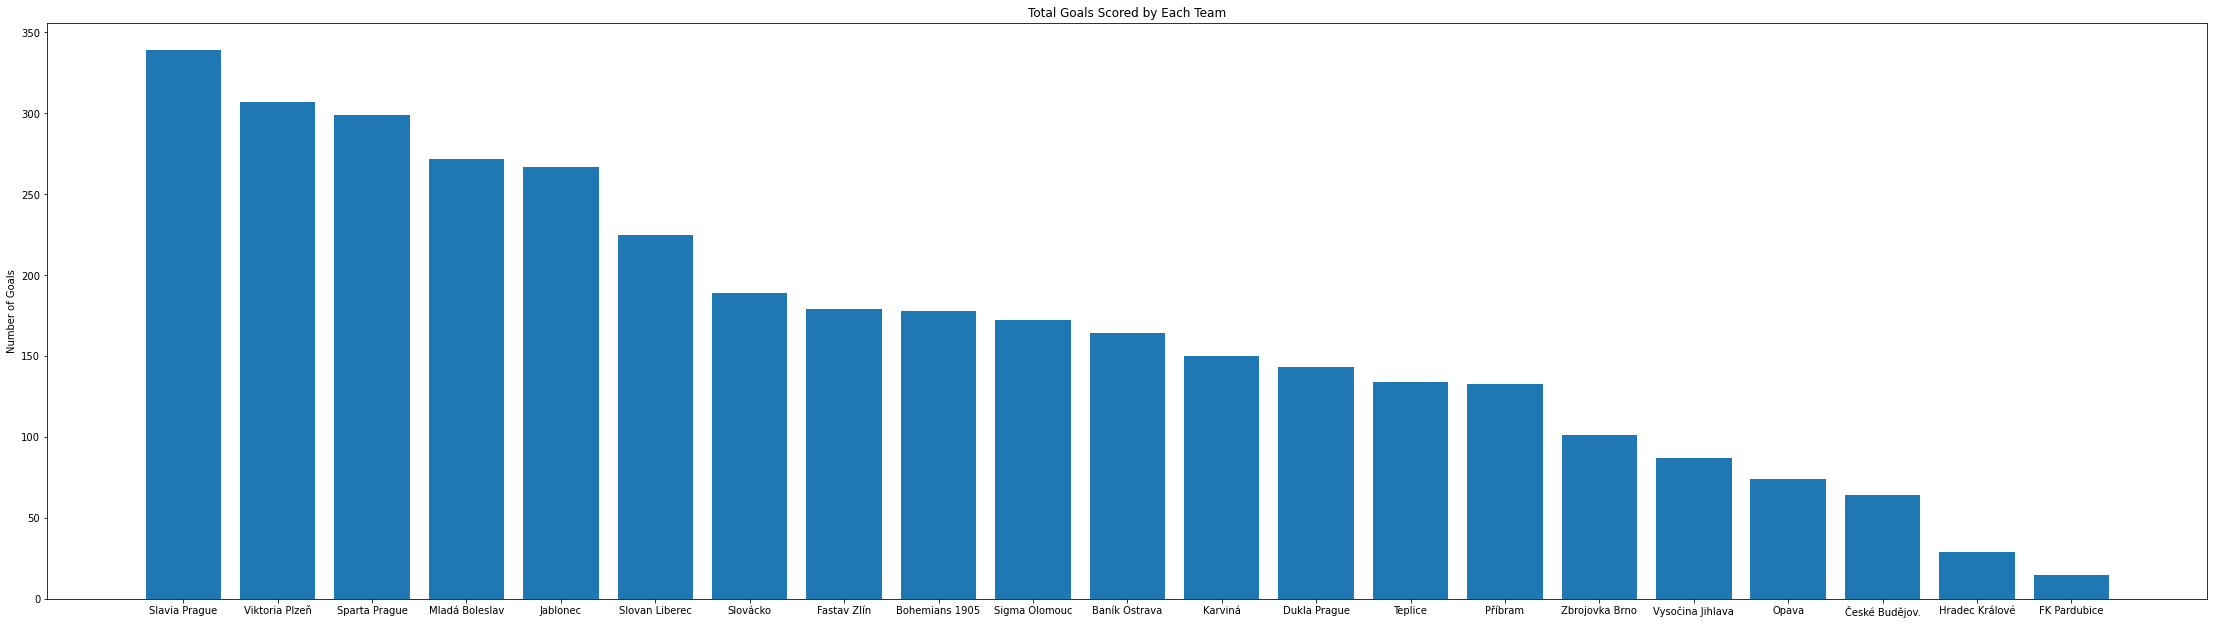

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,5,2])
ax.bar(goals_df_sortedby_total["Team"], goals_df_sortedby_total["Total Goals"])
ax.set_ylabel('Number of Goals')
ax.set_title('Total Goals Scored by Each Team')
plt.show()

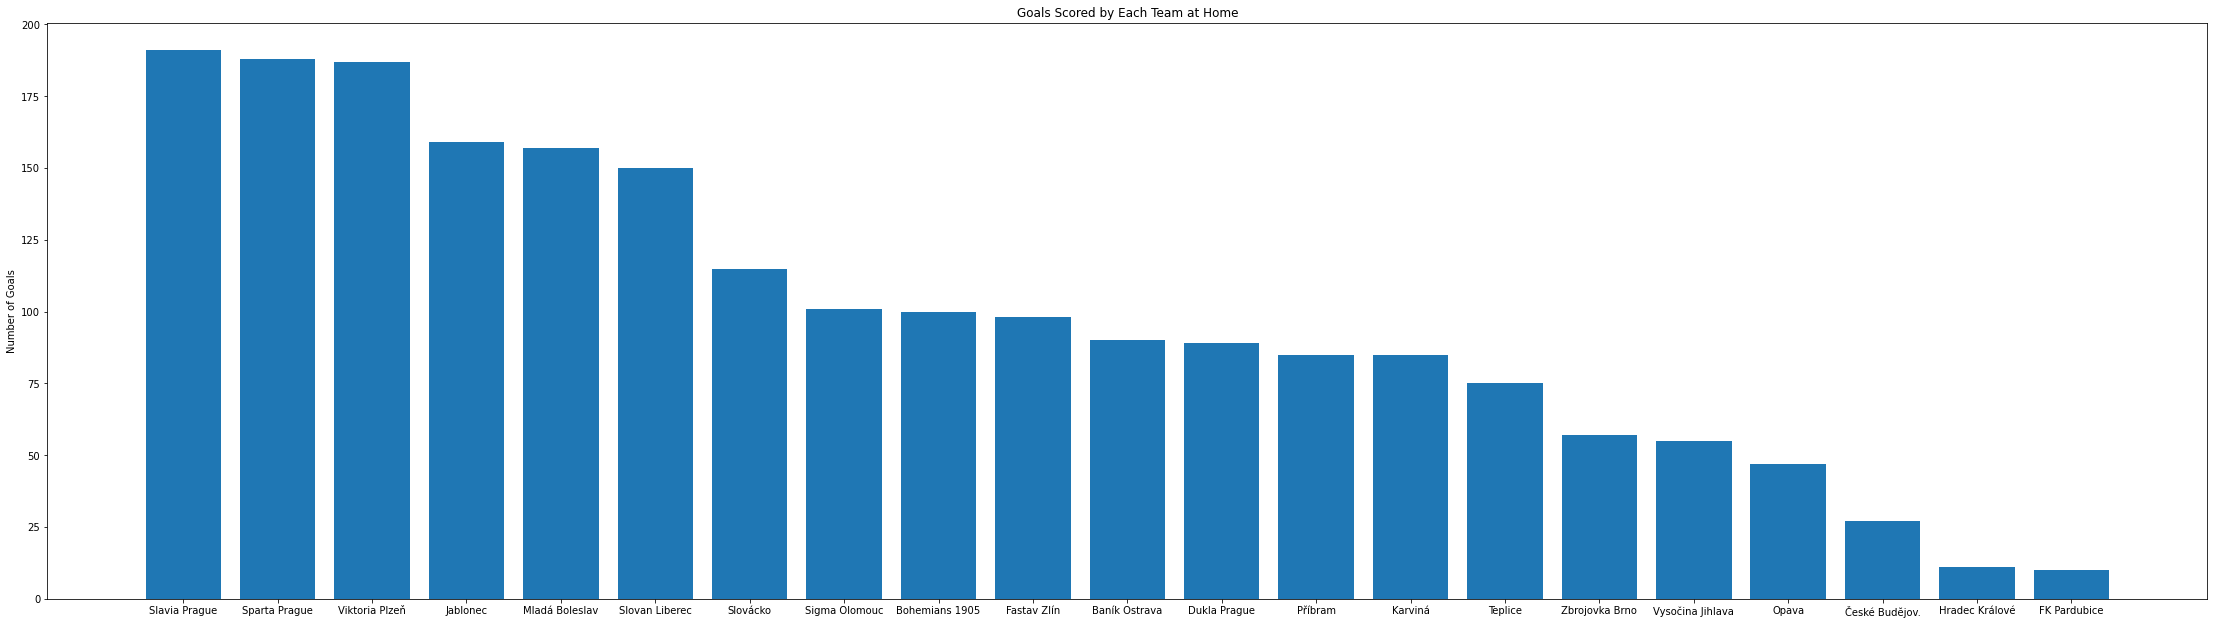

In [10]:
goals_df_sortedby_home = goals_df.sort_values(by = "Home Team Goals", ascending = False)
fig = plt.figure()
ax = fig.add_axes([0,0,5,2])
ax.bar(goals_df_sortedby_home["Team"], goals_df_sortedby_home["Home Team Goals"])
ax.set_ylabel('Number of Goals')
ax.set_title('Goals Scored by Each Team at Home')
plt.show()

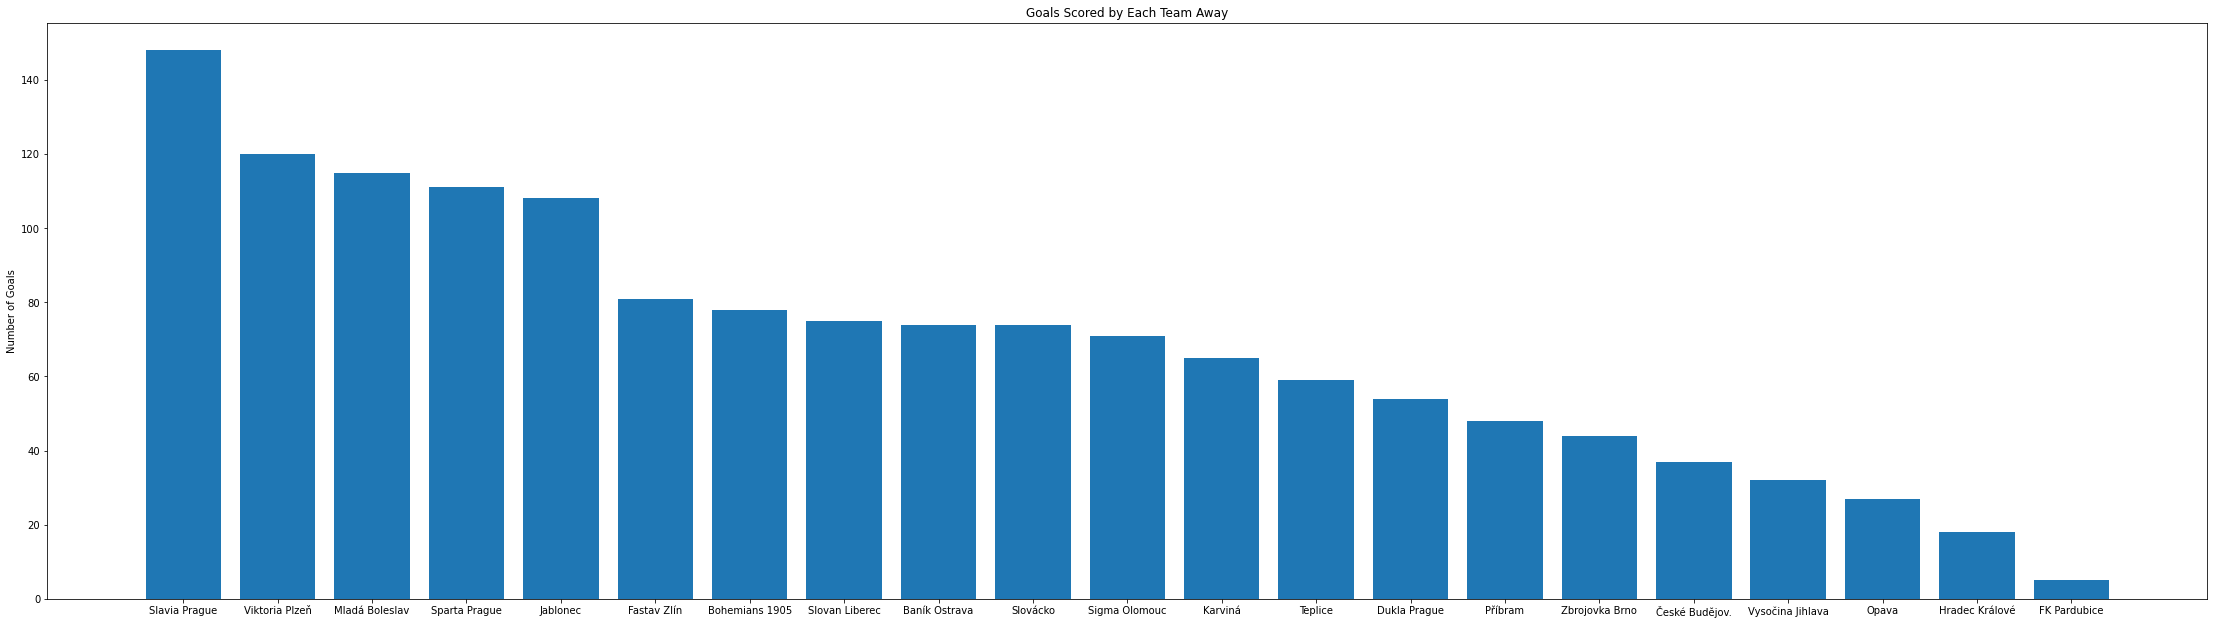

In [11]:
goals_df_sortedby_away = goals_df.sort_values(by = "Away Team Goals", ascending = False)
fig = plt.figure()
ax = fig.add_axes([0,0,5,2])
ax.bar(goals_df_sortedby_away["Team"], goals_df_sortedby_away["Away Team Goals"])
ax.set_ylabel('Number of Goals')
ax.set_title('Goals Scored by Each Team Away')
plt.show()

In [12]:
goals_df["h/a_ratio"] = goals_df["Home Team Goals"] / goals_df["Away Team Goals"]
goals_df_sortedby_haratio = goals_df.sort_values(by = "h/a_ratio", ascending = False)
goals_df_sortedby_haratio

,Team,Home Team Goals,Away Team Goals,Total Goals,h/a_ratio
3,FK Pardubice,10,5,15,2.000000
13,Slovan Liberec,150,75,225,2.000000
10,Příbram,85,48,133,1.770833
9,Opava,47,27,74,1.740741
18,Vysočina Jihlava,55,32,87,1.718750
15,Sparta Prague,188,111,299,1.693694
2,Dukla Prague,89,54,143,1.648148
17,Viktoria Plzeň,187,120,307,1.558333
14,Slovácko,115,74,189,1.554054
6,Jablonec,159,108,267,1.472222


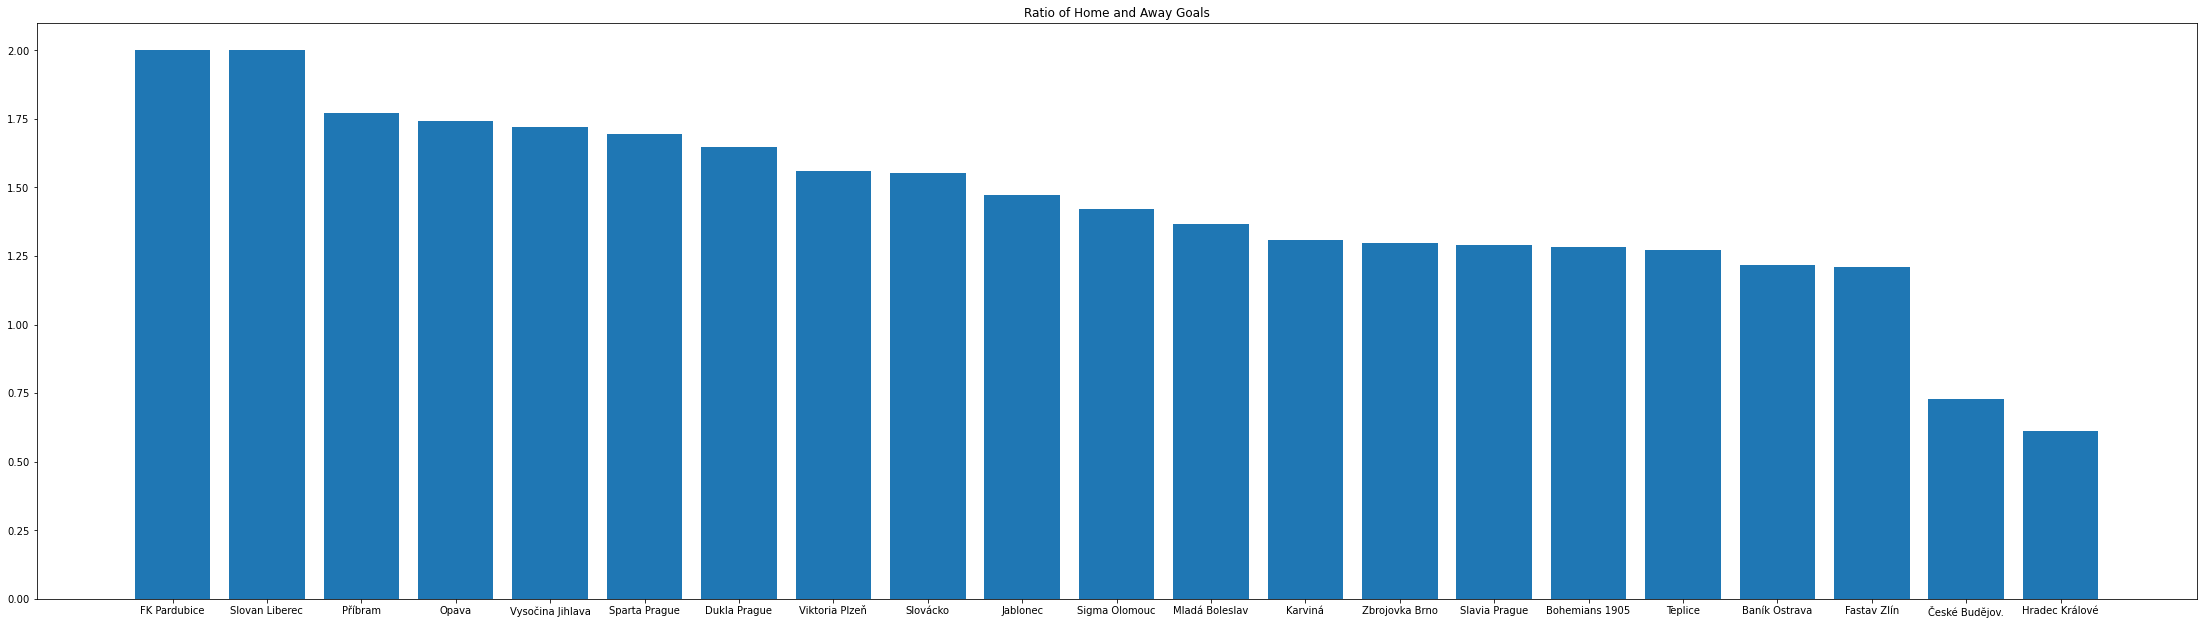

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,5,2])
ax.bar(goals_df_sortedby_haratio["Team"], goals_df_sortedby_haratio["h/a_ratio"])
ax.set_title('Ratio of Home and Away Goals')
plt.show()

In [14]:
year = []
for y in scores_clean['Date']:
    year.append(y[0:4])
scores = scores_clean.copy()
scores['Year'] = year
scores

,Date,Weekday,Time,Home Team,Away Team,Home Team Goals,Away Team Goals,Venue,Referee,Year
0,2015-07-24,Fri,17:30,Viktoria Plzeň,Slavia Prague,2,1,Doosan Arena,Pavel Franek,2015
1,2015-07-24,Fri,19:00,Vysočina Jihlava,Sparta Prague,0,0,Stadion v Jiráskově ulici,Tomas Kocourek,2015
2,2015-07-25,Sat,17:00,Příbram,Jablonec,2,3,Energon Aréna,Pavel Královec,2015
3,2015-07-25,Sat,17:00,Slovácko,Dukla Prague,4,3,Městský fotbalový stadion Miroslava Vale...,Zbyněk Proske,2015
4,2015-07-25,Sat,17:00,Zbrojovka Brno,Baník Ostrava,2,1,Městský fotbalový stadion Srbská,Libor Kovařík,2015
...,...,...,...,...,...,...,...,...,...,...
1524,2020-12-23,Wed,15:00,Karviná,FK Pardubice,0,2,Městský stadion,Miroslav Zelinka,2020
1526,2020-12-23,Wed,15:00,Fastav Zlín,Teplice,2,3,Stadion Letná,J. Machálek,2020
1527,2020-12-23,Wed,15:00,Zbrojovka Brno,Baník Ostrava,0,1,Městský fotbalový stadion Srbská,Ondřej Berka,2020
1528,2020-12-23,Wed,15:00,Mladá Boleslav,Slovácko,2,3,Adidas Aréna,Jan Petřík,2020


In [15]:
scores['Date'] = pd.to_datetime(scores['Date'])

def gimme_season_pivot(start_date, end_date):
    mask = (scores['Date'] > start_date) & (scores['Date'] <= end_date)
    season_scores = scores.loc[mask]
    hgoals_pivot = pd.pivot_table(season_scores, values = "Home Team Goals", index = "Home Team", aggfunc = np.sum)
    agoals_pivot = pd.pivot_table(season_scores, values = "Away Team Goals", index = "Away Team", aggfunc = np.sum)
    hgoals_pivot_df = pd.DataFrame(hgoals_pivot)
    hgoals_pivot_df["Team"] = hgoals_pivot_df.index
    agoals_pivot_df = pd.DataFrame(agoals_pivot)
    agoals_pivot_df["Team"] = agoals_pivot_df.index
    season_goals_df = pd.merge(hgoals_pivot_df, agoals_pivot_df, on = "Team")
    season_goals_df["Total Goals"] = season_goals_df["Home Team Goals"] + season_goals_df["Away Team Goals"]
    season_goals_df = season_goals_df.reindex(columns=["Team", "Home Team Goals", "Away Team Goals", "Total Goals"])
    season_goals_df_sortedby_total = season_goals_df.sort_values(by = "Total Goals", ascending = False)
    return season_goals_df_sortedby_total

In [20]:
start_date = "2019-07-11"
end_date = "2020-07-12"
season_pivot_1920 = gimme_season_pivot(start_date, end_date)
season_pivot_1920

,Team,Home Team Goals,Away Team Goals,Total Goals
9,Slavia Prague,40,29,69
14,Viktoria Plzeň,46,22,68
12,Sparta Prague,44,22,66
10,Slovan Liberec,39,18,57
5,Mladá Boleslav,37,19,56
3,Jablonec,31,17,48
0,Baník Ostrava,28,19,47
15,České Budĕjov.,23,24,47
1,Bohemians 1905,27,17,44
8,Sigma Olomouc,21,18,39


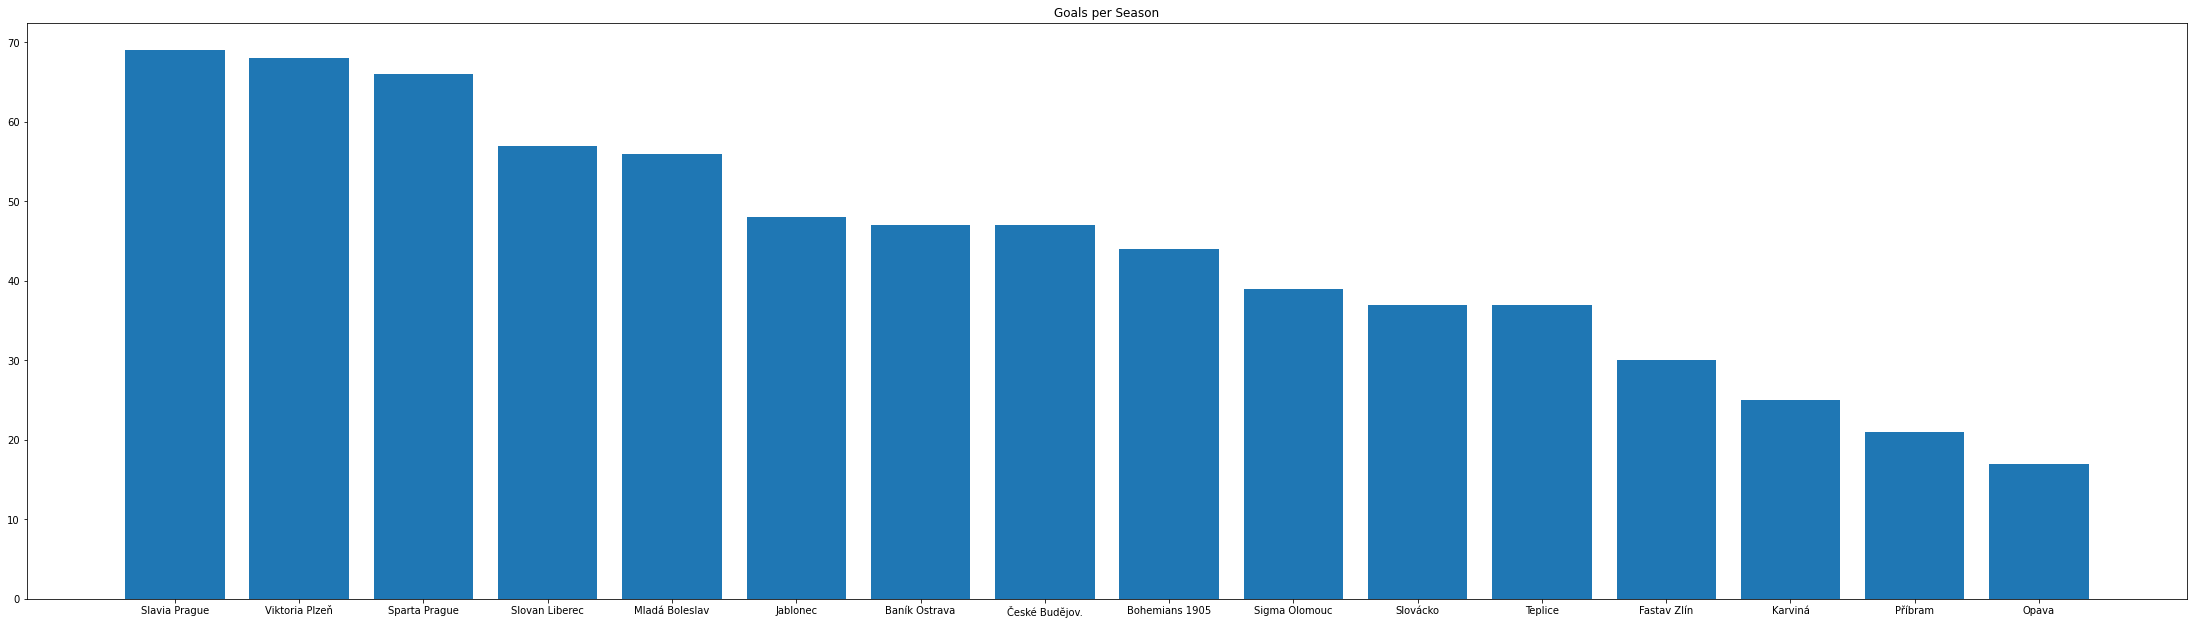

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,5,2])
ax.bar(season_pivot_1920["Team"], season_pivot_1920["Total Goals"])
ax.set_title('Goals per Season')
plt.show()

Creating pivot tables for all remaining seasons from our dataset:

In [28]:
season_pivot_2021 = gimme_season_pivot("2020-08-20", "2021-05-28")
season_pivot_1819 = gimme_season_pivot("2018-07-19", "2019-05-26")
season_pivot_1718 = gimme_season_pivot("2017-07-27", "2018-05-26")
season_pivot_1617 = gimme_season_pivot("2016-07-29", "2017-05-27")
season_pivot_1516 = gimme_season_pivot("2015-07-23", "2016-05-14")

Plotting the total number of goals scored in each season:

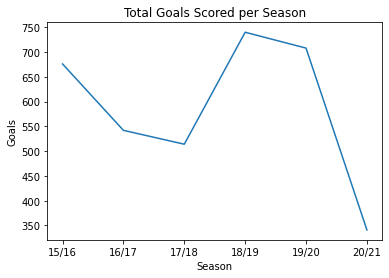

In [37]:
season_pivots = [season_pivot_1516, season_pivot_1617, season_pivot_1718, season_pivot_1819, season_pivot_1920, season_pivot_2021]
season_goals = []
for i in season_pivots:
    sum_all = sum(i["Total Goals"])
    season_goals.append(sum_all)
seasons = ["15/16", "16/17", "17/18", "18/19", "19/20", "20/21"]
plt.plot(seasons,season_goals)
plt.title('Total Goals Scored per Season')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.show()

Plotting the mean number of goals scored in each season:

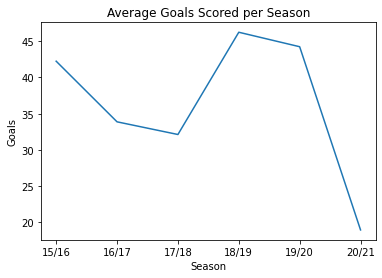

In [39]:
season_mean_goals = []
for i in season_pivots:
    mean_all = sum(i["Total Goals"])/len(i["Total Goals"])
    season_mean_goals.append(mean_all)
seasons = ["15/16", "16/17", "17/18", "18/19", "19/20", "20/21"]
plt.plot(seasons,season_mean_goals)
plt.title('Average Goals Scored per Season')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.show()